In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

C:\Users\Joe Vogel\AppData\Local\Temp\ipykernel_1444\2033994732.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Import data

In [38]:

csv_file = '../results/CMA_ES-07_03-21_44/7_0/all_results.csv'

df = pd.read_csv(csv_file)

# Remove colunas desnecessárias
df = df.drop(['Strength', 'Strength_Min', 'Cavitation', 'Cavitation_Max', 'Tip_Velocity', 'Tip_Velocity_Max'], axis=1)

# Formata os dados
df_7 = df.astype({"P_B": float, "Valid": bool, "Run": int, "Generation": int})


In [39]:
df_7 = df_7[df_7['Run'] == 0]

df_7

,V_S,Z,D,AEdAO,PdD,P_B,Generation,Run,Valid
0,7.0,2,0.774471,0.913741,0.848490,96.724000,1,0,True
1,7.0,2,0.635491,0.749233,0.820603,113.952865,1,0,False
2,7.0,2,0.774520,0.809806,0.777864,96.258436,1,0,True
3,7.0,2,0.719480,0.975053,0.867450,101.904337,1,0,True
4,7.0,2,0.795300,0.875687,0.929285,95.609921,1,0,True
...,...,...,...,...,...,...,...,...,...
115785,7.0,7,0.800000,0.715903,0.769828,82.944238,264,0,True
115786,7.0,7,0.800000,0.715903,0.769828,82.944238,264,0,True
115787,7.0,7,0.800000,0.715903,0.769828,82.944238,264,0,True
115788,7.0,7,0.800000,0.715903,0.769828,82.944238,264,0,True


## Contagem de diferentes

In [48]:
percentage = 0.005

In [41]:
# Função para contar valores de P_B que diferem dos demais por mais de 1%
def count_different_by_percent(group):
    count = 0
    for i, value in enumerate(group['P_B']):
        differences = abs(group['P_B'] - value) / value > percentage
        if differences.sum() > 1:  # Ignora a própria comparação
            count += 1
    return count

In [49]:
# Agrupar por 'Generation' e aplicar a função de contagem
result = df_7.groupby('Generation', group_keys=False).apply(count_different_by_percent).reset_index(name='Count_Different')
print(result)

     Generation  Count_Different
0             1               30
1             2               30
2             3               30
3             4               30
4             5               30
..          ...              ...
548         549                0
549         550                0
550         551                0
551         552                0
552         553                0

[553 rows x 2 columns]


C:\Users\Joe Vogel\AppData\Local\Temp\ipykernel_1444\1914451251.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = df_7.groupby('Generation', group_keys=False).apply(count_different_by_percent).reset_index(name='Count_Different')


## Gera o gráfico

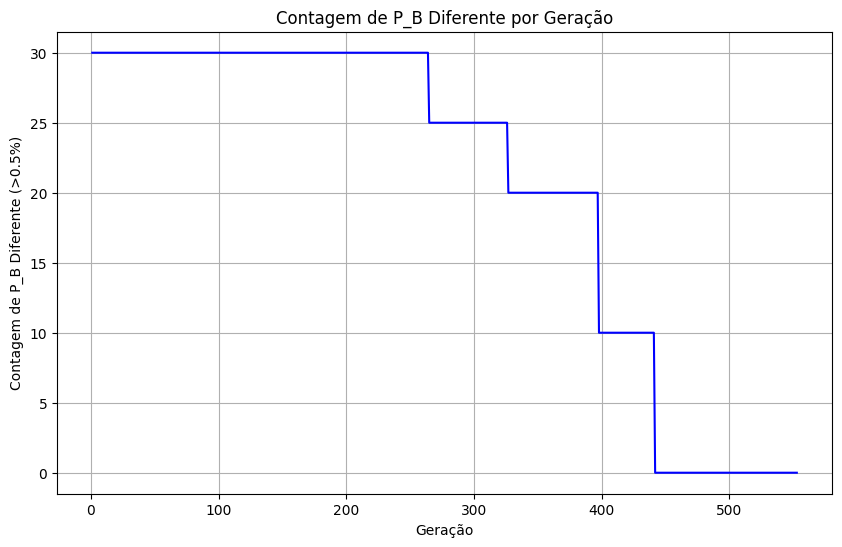

In [51]:
# Gerar gráfico de linha
plt.figure(figsize=(10, 6))
plt.plot(result['Generation'], result['Count_Different'], linestyle='-', color='b')

# Definir o título e os rótulos dos eixos
plt.title('Contagem de P_B Diferente por Geração')
plt.xlabel('Geração')
plt.ylabel(f'Contagem de P_B Diferente (>{percentage*100}%)')

# Mostrar o gráfico
plt.grid(True)
plt.show()